In [87]:
#pip install dash

In [88]:
# data
import pandas as pd
import numpy as np
from datetime import datetime
from math import ceil

# plots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# processing
from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.base import clone

# clustering models
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# metrics
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples

# multidimensional visualization methods
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

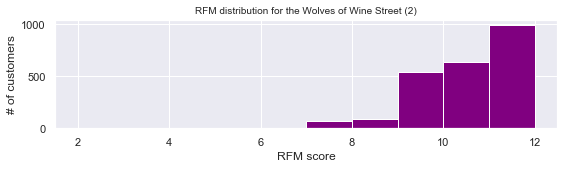

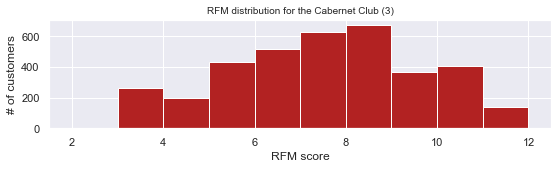

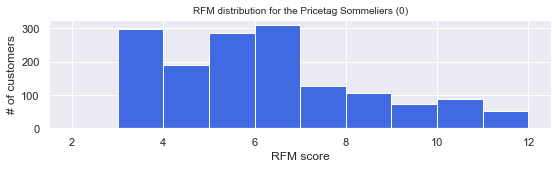

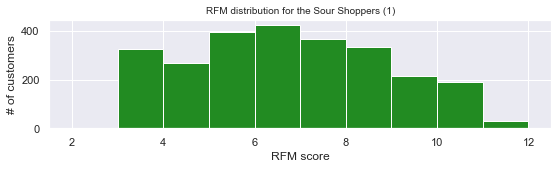

In [113]:
#RFM variable by final clusters

#plot 3 
plt.figure(figsize=(9,2))
plt.hist(df_merged[df_merged.merged_labels==2].RFM, color = "purple",range= (2, 12))
plt.ylabel("# of customers")
plt.xlabel("RFM score")
plt.title("RFM distribution for the Wolves of Wine Street (2)", size=10)

#plot 4 
plt.figure(figsize=(9,2))
plt.hist(df_merged[df_merged.merged_labels==3].RFM, color = "firebrick",range= (2, 12))
plt.ylabel("# of customers")
plt.xlabel("RFM score")
plt.title("RFM distribution for the Cabernet Club (3)", size=10)

#plot 1
plt.figure(figsize=(9,2))
plt.hist(df_merged[df_merged.merged_labels==0].RFM, color = "royalblue", range= (2, 12))
plt.ylabel("# of customers")
plt.xlabel("RFM score")
plt.title("RFM distribution for the Pricetag Sommeliers (0)", size=10)

#plot 2
plt.figure(figsize=(9,2))
plt.hist(df_merged[df_merged.merged_labels==1].RFM, color = "forestgreen", range= (2, 12))
plt.ylabel("# of customers")
plt.xlabel("RFM score")
plt.title("RFM distribution for the Sour Shoppers (1)", size=10)

plt.show()

In [7]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

In [8]:
df = pd.read_csv('df_clustered.csv')
df.set_index('Custid', inplace = True)

In [89]:
df_merged=df.copy()

In [78]:
df.merged_labels.value_counts()

3    3611
1    2545
2    2317
0    1528
Name: merged_labels, dtype: int64

In [79]:
#pulling slices out: 
import plotly.graph_objects as go

labels = ['Cluster 3','Cluster 1','Cluster 2','Cluster 0']
values = [3611, 2545, 2317, 1528]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])], 
               layout =)
fig.show()

In [112]:
#2: purple,3: r,0: b, 1:g
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df, names='merged_labels', color_discrete_sequence=["lightgrey","forestgreen","lightgrey","lightgrey"])
fig.update_traces(textfont_size=20)
fig.show()

In [111]:
#2: purple,3: r,0: b, 1:g
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df, names='merged_labels', color_discrete_sequence=["lightgrey","lightgrey","purple","lightgrey"])
fig.update_traces(textfont_size=20)
fig.show()

In [110]:
#2: purple,3: r,0: b, 1:g
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df, names='merged_labels', color_discrete_sequence=["firebrick","lightgrey","lightgrey","lightgrey"])
fig.update_traces(textfont_size=20)
fig.show()

In [109]:
#2: purple,3: r,0: b, 1:g
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df, names='merged_labels', color_discrete_sequence=["lightgrey","lightgrey","lightgrey","royalblue"])
fig.update_traces(textfont_size=20)
fig.show()

In [ ]:
#2: purple,3: r,0: b, 1:g
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df, names='merged_labels', color_discrete_sequence=["firebrick","forestgreen","purple","royalblue"])
fig.show()

In [54]:
df[['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic']].mean()

Dryred      50.3827
Sweetred     7.0545
Drywh       28.5213
Sweetwh      7.0698
Dessert      6.9474
Exotic      16.5466
dtype: float64

In [49]:
wine_pref = pd.DataFrame(df.groupby("merged_labels")[['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic']].mean().T)

In [52]:
wine_pref.columns=['Cluster0', 'Cluster1','Cluster2','Cluster3']

In [55]:
wine_pref["All"]=df[['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic']].mean()

In [71]:
fig = px.pie(wine_pref, names = ['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic'], values = "Cluster0")
fig.show()

In [21]:
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(df, names = ['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic'], values = df[['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic']].mean())
fig.show()

In [67]:

import pandas as pd

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

In [68]:
# you need to include __name__ in your Dash constructor if
# you plan to use a custom CSS or JavaScript in your Dash apps
app = dash.Dash(__name__)

#---------------------------------------------------------------
app.layout = html.Div([
    html.Div([
        html.Label(['Wine Preferences by Cluster']),
        dcc.Dropdown(
            id='my_dropdown',
            options=[
                     {'label': 'All', 'value': 'All'},
                     {'label': 'Cluster 0', 'value': 'Cluster0'},
                     {'label': 'Cluster 1', 'value': 'Cluster1'},
                     {'label': 'Cluster 2', 'value': 'Cluster2'},
                     {'label': 'Cluster 3', 'value': 'Cluster3'}
                
            ],
            value='All',
            multi=False,
            clearable=False,
            style={"width": "50%"}
        ),
    ]),

    html.Div([
        dcc.Graph(id='the_graph')
    ]),

])

#---------------------------------------------------------------
@app.callback(
    Output(component_id='the_graph', component_property='figure'),
    [Input(component_id='my_dropdown', component_property='value')]
)

def update_graph(my_dropdown):
    dff = wine_pref

    piechart=px.pie(
            data_frame=dff,
            names= ['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic'],
            values = my_dropdown,
            )

    return (piechart)


if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

In [69]:
%tb

SystemExit: 1

In [32]:
fig = px.sunburst(wine_pref)
fig.show()